In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
data = pd.read_csv('/Users/apple/Desktop/Desktop/SHC_Punjab_Amritsar_Ajnala_Basic.csv')
df1 = pd.read_csv('/Users/apple/Desktop/Documents/DataX-AgriAI-master/SHC_Data/SHC_Punjab_Amritsar_Ajnala_Recomendations.csv')
df2 = pd.read_csv('/Users/apple/Desktop/Documents/DataX-AgriAI-master/SHC_Data/SHC_Punjab_Amritsar_Ajnala_Fertilizers.csv')

In [17]:
data.head()

,SampleNo,LandArea(Acre),Longitude,Latitude,pH,EC (ds/m),Organic Carbon (% L),Phosphorus (kg/ha),Phosphorus Label,Potassium (kh/ha),...,Sulphur (ppm),Sulphur label,Zinc(ppm),Zinc Label,Iron(ppm),Iron Label,Manganese (ppm),Maganese Label,Copper(ppm),copper Label
0,PB/2017-18/95349546/2,3.0,31.862822,74.630238,8.26,0.13,0.46,29.16,M,144.19,...,8.46,D,1.04,S,23.72,S,2.06,S,1.76,S
1,PB/2017-18/95349546/1,3.0,31.862822,74.630238,8.26,0.13,0.46,29.16,M,144.19,...,8.46,D,1.04,S,23.72,S,2.06,S,1.76,S
2,PB/2017-18/95349583/2,3.0,31.861021,74.630262,7.77,0.13,0.39,25.24,M,235.65,...,21.14,S,0.76,S,9.97,S,2.19,S,1.58,S
3,PB/2017-18/95349583/1,3.0,31.861021,74.630262,7.77,0.13,0.39,25.24,M,235.65,...,21.14,S,0.76,S,9.97,S,2.19,S,1.58,S
4,PB/2017-18/95349622/1,5.0,31.857921,74.630546,8.24,0.12,0.43,39.98,M,182.16,...,16.82,S,0.82,S,24.83,S,2.63,S,1.70,S


In [18]:
data.count()

SampleNo                1415
LandArea(Acre)          1411
Longitude               1415
Latitude                1415
pH                      1415
EC (ds/m)               1415
Organic Carbon (% L)    1415
Phosphorus (kg/ha)      1415
Phosphorus Label        1415
Potassium (kh/ha)       1415
Potessium Label         1415
Sulphur (ppm)           1415
Sulphur label           1415
Zinc(ppm)               1415
Zinc Label              1415
Iron(ppm)               1415
Iron Label              1415
Manganese (ppm)         1415
Maganese Label          1402
Copper(ppm)             1415
copper Label            1415
dtype: int64

In [19]:
data.describe()

,LandArea(Acre),Longitude,Latitude,pH,EC (ds/m),Organic Carbon (% L),Phosphorus (kg/ha),Potassium (kh/ha),Sulphur (ppm),Zinc(ppm),Iron(ppm),Manganese (ppm),Copper(ppm)
count,1411.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,4.995677,31.791895,74.732990,7.938042,0.299548,0.412855,15.539456,176.001230,29.465081,1.149329,11.752198,1.975138,1.883986
std,3.076096,0.125692,0.145229,0.437418,0.174358,0.052944,9.474515,116.725398,19.709855,0.679078,5.268741,1.433650,0.814497
min,0.500000,31.293880,74.363505,7.010000,0.100000,0.280000,2.370000,31.010000,6.240000,0.200000,1.570000,0.110000,0.290000
25%,3.000000,31.720864,74.623861,7.560000,0.200000,0.370000,8.200000,99.350000,17.290000,0.700000,7.885000,0.980000,1.355000
50%,4.000000,31.789400,74.781570,8.020000,0.250000,0.420000,13.180000,136.330000,24.080000,1.040000,10.890000,1.500000,1.710000
75%,7.000000,31.897605,74.841410,8.270000,0.330000,0.450000,20.070000,218.415000,34.710000,1.350000,14.830000,2.775000,2.250000
max,12.500000,31.998330,75.365745,8.920000,0.980000,0.570000,62.590000,894.430000,169.200000,5.690000,35.810000,6.740000,6.040000


In [5]:
df1.head()

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray
0,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime
1,PB/2017-18/95639425/1,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime
2,PB/2017-18/106910860/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime
3,PB/2017-18/106910860/1,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime
4,PB/2017-18/106978273/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime


In [20]:
df1.count()

SampleNo                                   1279
Parameters                                 1279
Fertilizer_Recommendations_ThroughSoil     1279
Fertilizer_Recommendations_ThroughSpray    1279
dtype: int64

In [22]:
df1.describe()

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray
count,1279,1279,1279,1279
unique,980,4,4,4
top,PB/2017-18/106910860/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...
freq,4,916,916,916


In [6]:
df2.head()

,SampleNo,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2
0,PB/2017-18/95349546/2,Buck Wheat (Kaspat),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
1,PB/2017-18/95349546/2,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
2,PB/2017-18/95349546/2,Maize,Neem Coated Urea : 361 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 130 | Neem Coa...
3,PB/2017-18/95349546/2,Mustard,Neem Coated Urea : 289 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 65 | Neem Coat...
4,PB/2017-18/95349546/2,Sugarcane,Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...


In [23]:
df2.count()

SampleNo                    6546
Crop_Name                   6546
Fertiliser_Combination_1    6546
Fertiliser_Combination_2    6546
dtype: int64

In [24]:
df2.describe()

,SampleNo,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2
count,6546,6546,6546,6546
unique,1410,7,80,84
top,PB/2017-18/95522227/1,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
freq,12,1415,2769,2769


In [7]:
dfinal = df1.merge(df2, on="SampleNo", how = 'inner')

In [25]:
dfinal.head(5)
#dfinal.describe()

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2
0,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Buck Wheat (Kaspat),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
1,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
2,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Maize,Neem Coated Urea : 361 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 130 | Neem Coa...
3,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Mustard,Neem Coated Urea : 289 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 65 | Neem Coat...
4,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Sugarcane,Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...


In [37]:
dfinal.count

<bound method DataFrame.count of                    SampleNo   Parameters  \
0     PB/2017-18/95639425/2    Iron (Fe)   
1     PB/2017-18/95639425/2    Iron (Fe)   
2     PB/2017-18/95639425/2    Iron (Fe)   
3     PB/2017-18/95639425/2    Iron (Fe)   
4     PB/2017-18/95639425/2    Iron (Fe)   
...                     ...          ...   
5633  PB/2017-18/95451228/1  Sulphur (S)   
5634  PB/2017-18/95451228/1  Sulphur (S)   
5635  PB/2017-18/95451228/1  Sulphur (S)   
5636  PB/2017-18/95451228/1  Sulphur (S)   
5637  PB/2017-18/95451228/1  Sulphur (S)   

                 Fertilizer_Recommendations_ThroughSoil  \
0     Ferrous sulphate (25-50 kg/ha) (Soil applicati...   
1     Ferrous sulphate (25-50 kg/ha) (Soil applicati...   
2     Ferrous sulphate (25-50 kg/ha) (Soil applicati...   
3     Ferrous sulphate (25-50 kg/ha) (Soil applicati...   
4     Ferrous sulphate (25-50 kg/ha) (Soil applicati...   
...                                                 ...   
5633             S @ 20-4

In [38]:
dfinal.describe()

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2
count,5638,5638,5638,5638,5638,5638,5638
unique,980,4,4,4,7,68,72
top,PB/2017-18/95522227/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
freq,24,3716,3716,3716,1289,2273,2273


In [41]:
dfinal2 = data.merge(dfinal, on="SampleNo", how = 'inner')

In [42]:
dfinal2.describe()

,LandArea(Acre),Longitude,Latitude,pH,EC (ds/m),Organic Carbon (% L),Phosphorus (kg/ha),Potassium (kh/ha),Sulphur (ppm),Zinc(ppm),Iron(ppm),Manganese (ppm),Copper(ppm)
count,5686.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000
mean,5.261062,31.825081,74.724084,7.886259,0.281103,0.418265,18.761036,225.954837,22.856312,0.862371,9.813934,1.311858,1.710091
std,3.691524,0.105098,0.125353,0.445228,0.147853,0.048710,9.322687,136.245087,16.331625,0.640290,4.579869,0.594280,0.727065
min,0.500000,31.293880,74.363957,7.080000,0.100000,0.290000,2.370000,31.010000,6.240000,0.200000,1.570000,0.110000,0.290000
25%,2.200000,31.784610,74.632270,7.510000,0.190000,0.390000,13.550000,126.020000,13.230000,0.450000,6.580000,0.930000,1.180000
50%,4.000000,31.853376,74.673020,7.890000,0.250000,0.420000,17.800000,204.470000,18.820000,0.610000,9.150000,1.300000,1.600000
75%,7.500000,31.897570,74.838652,8.260000,0.330000,0.450000,21.750000,270.820000,26.180000,1.070000,11.610000,1.590000,2.100000
max,12.500000,31.998330,74.989640,8.920000,0.980000,0.570000,62.070000,894.430000,169.200000,5.310000,35.810000,4.930000,4.230000


In [43]:
dfinal2.count()

SampleNo                                   5694
LandArea(Acre)                             5686
Longitude                                  5694
Latitude                                   5694
pH                                         5694
EC (ds/m)                                  5694
Organic Carbon (% L)                       5694
Phosphorus (kg/ha)                         5694
Phosphorus Label                           5694
Potassium (kh/ha)                          5694
Potessium Label                            5694
Sulphur (ppm)                              5694
Sulphur label                              5694
Zinc(ppm)                                  5694
Zinc Label                                 5694
Iron(ppm)                                  5694
Iron Label                                 5694
Manganese (ppm)                            5694
Maganese Label                             5684
Copper(ppm)                                5694
copper Label                            

In [33]:
df3 = dfinal.groupby(['Fertiliser_Combination_1','Fertiliser_Combination_2']).agg(lambda x:x.value_counts().index[0])


SampleNo                                   72
Parameters                                 72
Fertilizer_Recommendations_ThroughSoil     72
Fertilizer_Recommendations_ThroughSpray    72
Crop_Name                                  72
dtype: int64

In [36]:
df3.count()

SampleNo                                   72
Parameters                                 72
Fertilizer_Recommendations_ThroughSoil     72
Fertilizer_Recommendations_ThroughSpray    72
Crop_Name                                  72
dtype: int64

In [35]:
df3.head()

,,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name
Fertiliser_Combination_1,Fertiliser_Combination_2,,,,,
Neem Coated Urea : 0 | Single Superphosphate (16% P2O5 Granulated): 0 | Potassium Chloride (Muriate of Potash): 0,Diammonium Phosphate (18-46-0): 0 | Neem Coated Urea : 0 | Potassium Chloride (Muriate of Potash): 0,PB/2017-18/95522227/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Buck Wheat (Kaspat)
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 125 | Potassium Chloride (Muriate of Potash): 25,Diammonium Phosphate (18-46-0): 43 | Neem Coated Urea : 200 | Potassium Chloride (Muriate of Potash): 25,PB/2017-18/95520880/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Mustard
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 188 | Potassium Chloride (Muriate of Potash): 25,Diammonium Phosphate (18-46-0): 65 | Neem Coated Urea : 192 | Potassium Chloride (Muriate of Potash): 25,PB/2017-18/94964675/2,Zinc (Zn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Mustard
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 17,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 183 | Potassium Chloride (Muriate of Potash): 17,PB/2017-18/95481244/3,Zinc (Zn),Zinc sulphate (15 -25 kg/ha),0.5% Zinc sulphate +0.25% lime,Mustard
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 25,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 183 | Potassium Chloride (Muriate of Potash): 25,PB/2017-18/95451096/1,Zinc (Zn),Zinc sulphate (15 -25 kg/ha),0.5% Zinc sulphate +0.25% lime,Mustard


In [32]:
df3.drop_duplicates(subset=None, keep='first', inplace=False)

,,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name
Fertiliser_Combination_1,Fertiliser_Combination_2,,,,,
Neem Coated Urea : 0 | Single Superphosphate (16% P2O5 Granulated): 0 | Potassium Chloride (Muriate of Potash): 0,Diammonium Phosphate (18-46-0): 0 | Neem Coated Urea : 0 | Potassium Chloride (Muriate of Potash): 0,PB/2017-18/95522227/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Buck Wheat (Kaspat)
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 125 | Potassium Chloride (Muriate of Potash): 25,Diammonium Phosphate (18-46-0): 43 | Neem Coated Urea : 200 | Potassium Chloride (Muriate of Potash): 25,PB/2017-18/95520880/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Mustard
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 188 | Potassium Chloride (Muriate of Potash): 25,Diammonium Phosphate (18-46-0): 65 | Neem Coated Urea : 192 | Potassium Chloride (Muriate of Potash): 25,PB/2017-18/94964675/2,Zinc (Zn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Mustard
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 17,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 183 | Potassium Chloride (Muriate of Potash): 17,PB/2017-18/95481244/3,Zinc (Zn),Zinc sulphate (15 -25 kg/ha),0.5% Zinc sulphate +0.25% lime,Mustard
Neem Coated Urea : 217 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 25,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 183 | Potassium Chloride (Muriate of Potash): 25,PB/2017-18/95451096/1,Zinc (Zn),Zinc sulphate (15 -25 kg/ha),0.5% Zinc sulphate +0.25% lime,Mustard
...,...,...,...,...,...,...
Neem Coated Urea : 435 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 33,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 401 | Potassium Chloride (Muriate of Potash): 33,PB/2017-18/95449801/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Cotton
Neem Coated Urea : 435 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 50,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 401 | Potassium Chloride (Muriate of Potash): 50,PB/2017-18/95454106/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Cotton
Neem Coated Urea : 435 | Single Superphosphate (16% P2O5 Granulated): 250 | Potassium Chloride (Muriate of Potash): 67,Diammonium Phosphate (18-46-0): 87 | Neem Coated Urea : 401 | Potassium Chloride (Muriate of Potash): 67,PB/2017-18/95353614/2,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Cotton


In [26]:
dfinal.describe()

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2
count,5638,5638,5638,5638,5638,5638,5638
unique,980,4,4,4,7,68,72
top,PB/2017-18/95522227/1,Manganese (Mn),Manganese sulphate (10 -25 kg/ha),1 % Manganese sulphate + 0.25% lime or 0.5% Ma...,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
freq,24,3716,3716,3716,1289,2273,2273


In [27]:
dfinal.count()

SampleNo                                   5638
Parameters                                 5638
Fertilizer_Recommendations_ThroughSoil     5638
Fertilizer_Recommendations_ThroughSpray    5638
Crop_Name                                  5638
Fertiliser_Combination_1                   5638
Fertiliser_Combination_2                   5638
dtype: int64

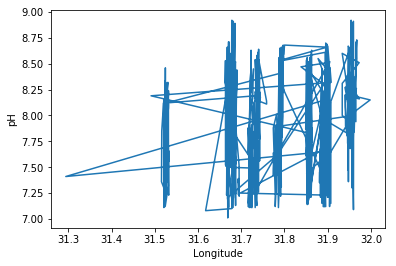

In [28]:
#plt.plot('Longitude','pH')
#data=data.astype(float)
#data.plot(x='Longitude', y='EC', style='o')
plt.plot(data['Longitude'], data['pH'])
plt.xlabel("Longitude")
plt.ylabel("pH")
plt.show()

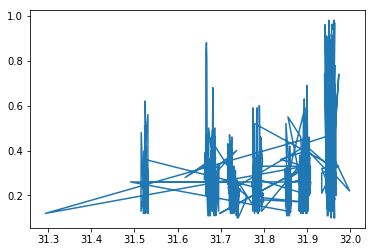

In [13]:
plt.plot(data['Longitude'], data['EC (ds/m)'])
plt.show()

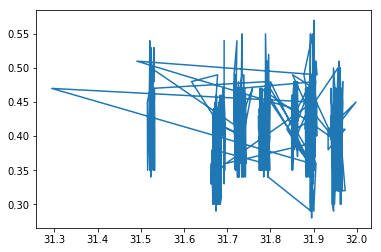

In [14]:
plt.plot(data['Longitude'], data['Organic Carbon (% L)'])
plt.show()

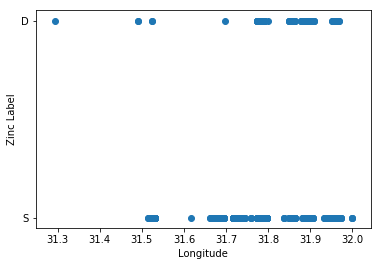

In [15]:
plt.scatter(data['Longitude'], data['Zinc Label'])
plt.xlabel("Longitude")
plt.ylabel("Zinc Label")
plt.show()

<BarContainer object of 1415 artists>

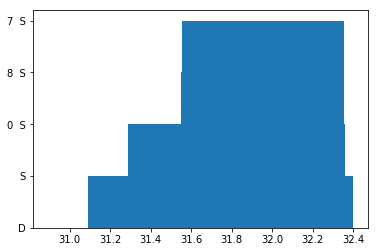

In [48]:
plt.bar(data['Longitude'], data['Sulphur label'])

<BarContainer object of 1415 artists>

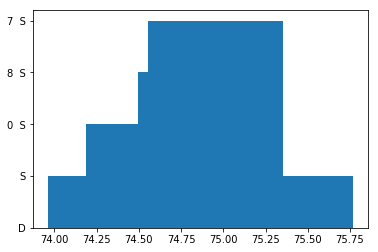

In [49]:
plt.bar(data['Latitude'], data['Sulphur label'])

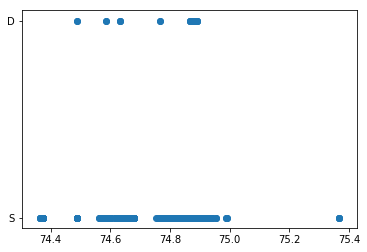

In [52]:
plt.scatter(data['Latitude'],data['Iron Label'])

<Figure size 576x648 with 0 Axes>

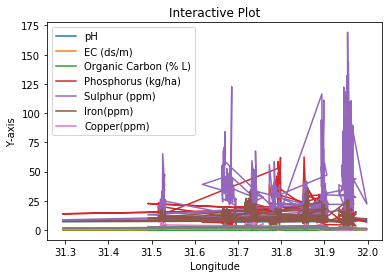

<Figure size 576x648 with 0 Axes>

In [66]:
plt.plot(data['Longitude'], data['pH'])
plt.plot(data['Longitude'], data['EC (ds/m)'])
plt.plot(data['Longitude'], data['Organic Carbon (% L)'])
plt.plot(data['Longitude'], data['Phosphorus (kg/ha)'])
plt.plot(data['Longitude'], data['Sulphur (ppm)'])
plt.plot(data['Longitude'], data['Iron(ppm)'])
plt.plot(data['Longitude'], data['Manganese (ppm)'])
plt.plot(data['Longitude'], data['Copper(ppm)'])


plt.legend(['pH', 'EC (ds/m)', 'Organic Carbon (% L)', 'Phosphorus (kg/ha)','Sulphur (ppm)','Iron(ppm)', 'Copper(ppm)'], loc='upper left')

# Add labels and title
plt.title("Interactive Plot")
plt.xlabel("Longitude")
plt.ylabel("Y-axis")
plt.figure(figsize=(8,9))

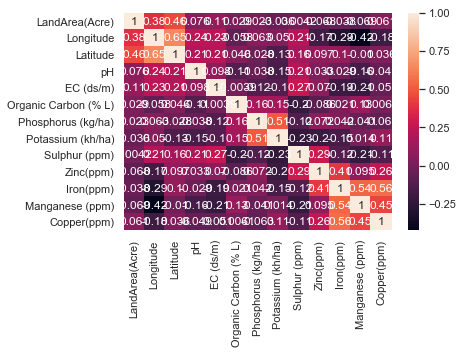

<Figure size 1440x1440 with 0 Axes>

In [152]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.figure(figsize = (20,20))
plt.show()

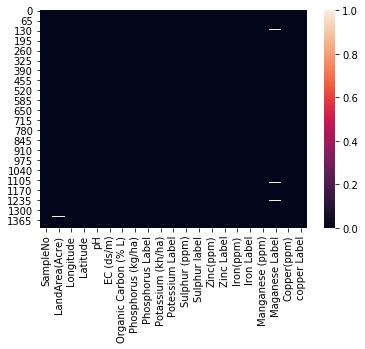

<Figure size 1440x576 with 0 Axes>

In [73]:
sns.heatmap(data.isnull())
plt.figure(figsize=(20, 8))
plt.show()

In [84]:
df2 = pd.read_csv('/Users/apple/Desktop/Documents/DataX-AgriAI-master/SHC_Data/SHC_Punjab_Amritsar_Ajnala_Fertilizers.csv')

In [76]:
sns.set(style="darkgrid")

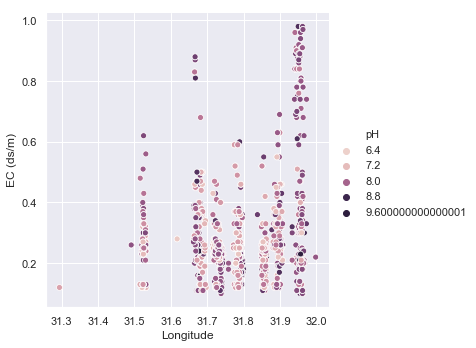

In [82]:
#f = sns.load_dataset("SHC_Punjab_Amritsar_Ajnala_Basic.csv")
sns.relplot(x="Longitude", y="EC (ds/m)", hue="pH", data=data);

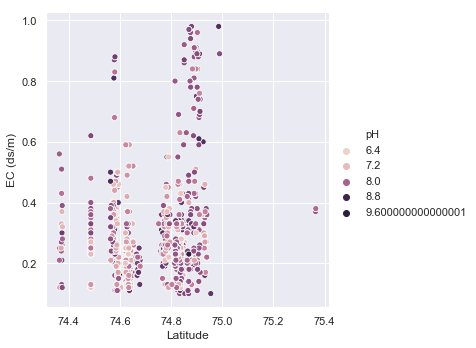

In [83]:
sns.relplot(x="Latitude", y="EC (ds/m)", hue="pH", data=data);

In [112]:
sns.catplot(x="Parameters",y="Crop_Name",data = dfinal)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [110]:
dfinal.head()

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2
0,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Buck Wheat (Kaspat),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
1,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...
2,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Maize,Neem Coated Urea : 361 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 130 | Neem Coa...
3,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Mustard,Neem Coated Urea : 289 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 65 | Neem Coat...
4,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Sugarcane,Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...


In [113]:
df  = dfinal.merge(data, on="SampleNo", how = 'inner')

In [114]:
df.head(5)

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2,LandArea(Acre),Longitude,Latitude,...,Sulphur (ppm),Sulphur label,Zinc(ppm),Zinc Label,Iron(ppm),Iron Label,Manganese (ppm),Maganese Label,Copper(ppm),copper Label
0,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Buck Wheat (Kaspat),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...,3.0,31.525681,74.4866,...,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
1,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...,3.0,31.525681,74.4866,...,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
2,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Maize,Neem Coated Urea : 361 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 130 | Neem Coa...,3.0,31.525681,74.4866,...,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
3,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Mustard,Neem Coated Urea : 289 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 65 | Neem Coat...,3.0,31.525681,74.4866,...,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
4,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Sugarcane,Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...,3.0,31.525681,74.4866,...,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S


In [115]:
df.count()

SampleNo                                   5694
Parameters                                 5694
Fertilizer_Recommendations_ThroughSoil     5694
Fertilizer_Recommendations_ThroughSpray    5694
Crop_Name                                  5694
Fertiliser_Combination_1                   5694
Fertiliser_Combination_2                   5694
LandArea(Acre)                             5686
Longitude                                  5694
Latitude                                   5694
pH                                         5694
EC (ds/m)                                  5694
Organic Carbon (% L)                       5694
Phosphorus (kg/ha)                         5694
Phosphorus Label                           5694
Potassium (kh/ha)                          5694
Potessium Label                            5694
Sulphur (ppm)                              5694
Sulphur label                              5694
Zinc(ppm)                                  5694
Zinc Label                              

In [148]:
pd.set_option('display.max_columns', 500)
df.head(5)

,SampleNo,Parameters,Fertilizer_Recommendations_ThroughSoil,Fertilizer_Recommendations_ThroughSpray,Crop_Name,Fertiliser_Combination_1,Fertiliser_Combination_2,LandArea(Acre),Longitude,Latitude,pH,EC (ds/m),Organic Carbon (% L),Phosphorus (kg/ha),Phosphorus Label,Potassium (kh/ha),Potessium Label,Sulphur (ppm),Sulphur label,Zinc(ppm),Zinc Label,Iron(ppm),Iron Label,Manganese (ppm),Maganese Label,Copper(ppm),copper Label
0,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Buck Wheat (Kaspat),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...,3.0,31.525681,74.4866,7.85,0.25,0.46,36.56,M,101.52,L,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
1,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Paddy(Dhaan),Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...,3.0,31.525681,74.4866,7.85,0.25,0.46,36.56,M,101.52,L,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
2,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Maize,Neem Coated Urea : 361 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 130 | Neem Coa...,3.0,31.525681,74.4866,7.85,0.25,0.46,36.56,M,101.52,L,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
3,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Mustard,Neem Coated Urea : 289 | Single Superphosphat...,Diammonium Phosphate (18-46-0): 65 | Neem Coat...,3.0,31.525681,74.4866,7.85,0.25,0.46,36.56,M,101.52,L,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S
4,PB/2017-18/95639425/2,Iron (Fe),Ferrous sulphate (25-50 kg/ha) (Soil applicati...,1% Ferrous sulphate (Spray thrice)+ 0.5 % lime,Sugarcane,Neem Coated Urea : 0 | Single Superphosphate ...,Diammonium Phosphate (18-46-0): 0 | Neem Coate...,3.0,31.525681,74.4866,7.85,0.25,0.46,36.56,M,101.52,L,65.32,S,1.62,S,4.22,D,3.33,S,0.99,S


In [ ]:
sns.catplot(x="Parameters",y="",data=df)

In [122]:
df.columns

Index(['SampleNo', 'Parameters', 'Fertilizer_Recommendations_ThroughSoil',
       'Fertilizer_Recommendations_ThroughSpray', 'Crop_Name',
       'Fertiliser_Combination_1', 'Fertiliser_Combination_2',
       'LandArea(Acre)', 'Longitude', 'Latitude', 'pH', 'EC (ds/m)',
       'Organic Carbon (% L)', 'Phosphorus (kg/ha)', 'Phosphorus Label',
       'Potassium (kh/ha)', 'Potessium Label', 'Sulphur (ppm)',
       'Sulphur label', 'Zinc(ppm)', 'Zinc Label', 'Iron(ppm)', 'Iron Label',
       'Manganese (ppm)', 'Maganese Label', 'Copper(ppm)', 'copper Label'],
      dtype='object')

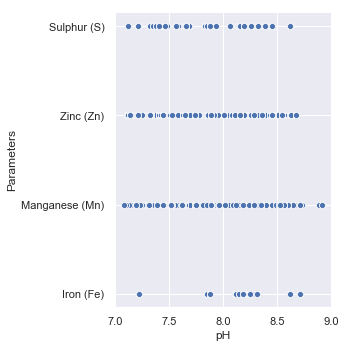

In [123]:
sns.relplot(x="pH", y="Parameters", data=df);

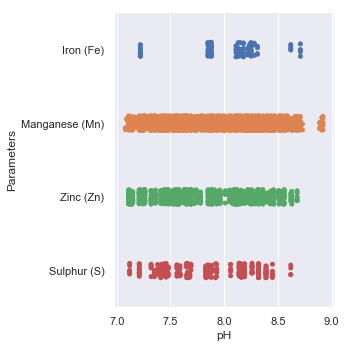

In [125]:
sns.catplot(x="pH",y="Parameters",data=df)

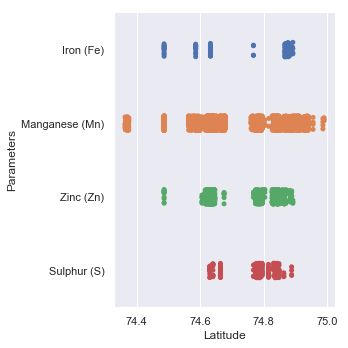

In [149]:
sns.catplot(x="Latitude",y="Parameters",data=df)

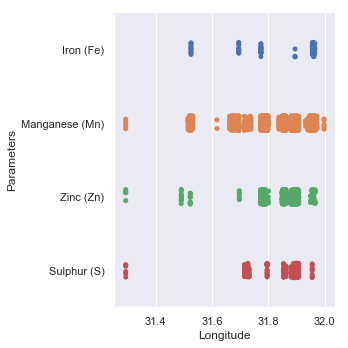

In [150]:
sns.catplot(x="Longitude",y="Parameters",data=df)

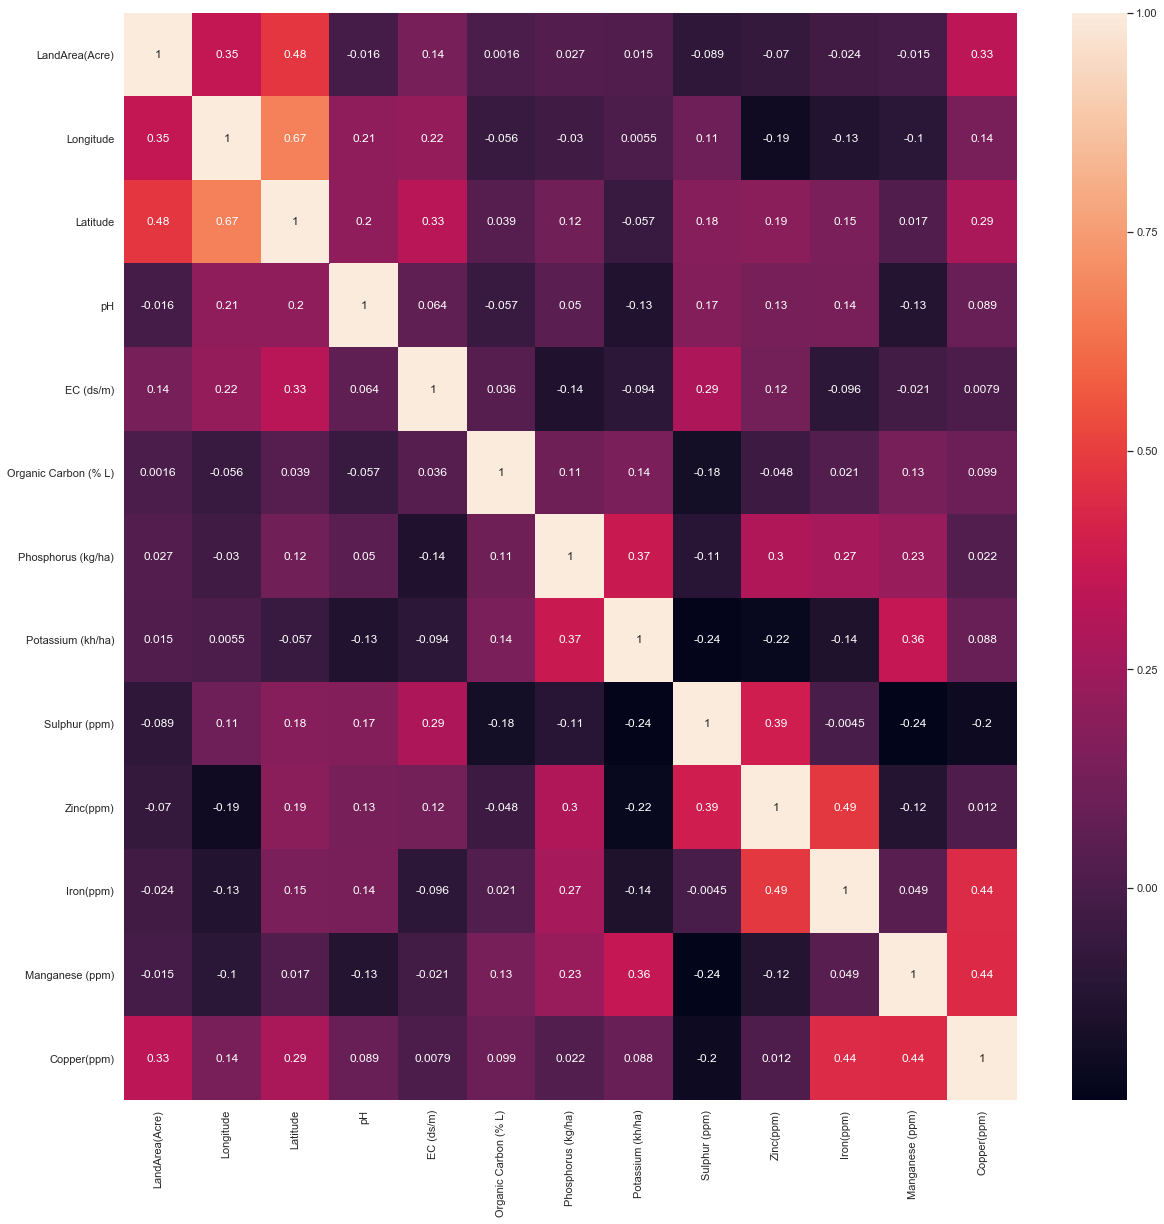

In [144]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

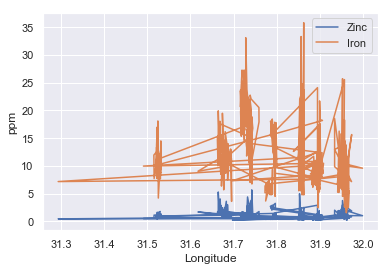

In [131]:
plt.plot(data['Longitude'], data['Zinc(ppm)'])
plt.plot(data['Longitude'], data['Iron(ppm)'])
plt.xlabel("Longitude")
plt.ylabel("ppm")
plt.legend(['Zinc','Iron'])

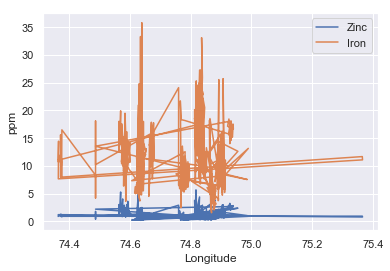

In [132]:
plt.plot(data['Latitude'], data['Zinc(ppm)'])
plt.plot(data['Latitude'], data['Iron(ppm)'])
plt.xlabel("Longitude")
plt.ylabel("ppm")
plt.legend(['Zinc','Iron'])

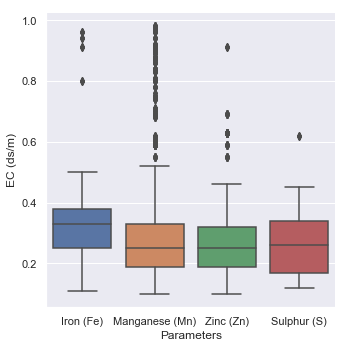

In [134]:
sns.catplot(x="Parameters", y="EC (ds/m)", kind="box", data=df);

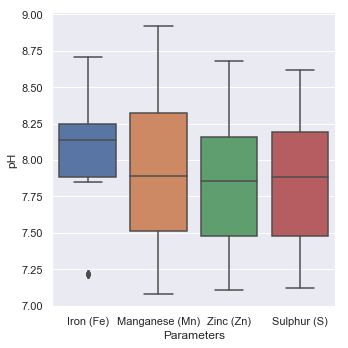

In [137]:
sns.catplot(x="Parameters", y="pH", kind="box", data=df);

Text(0,0.5,'Zinc')

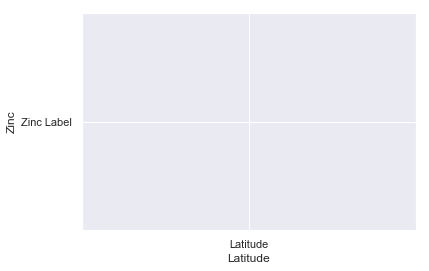

In [136]:
 plt.bar('Latitude', 'Zinc Label')
plt.xlabel('Latitude')
plt.ylabel('Zinc')

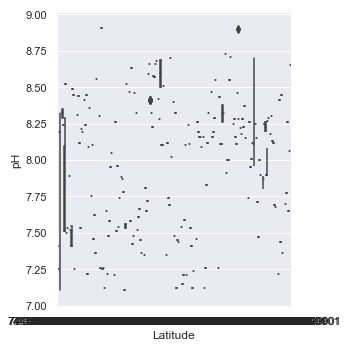

In [138]:
sns.catplot(x="Latitude", y="pH", kind="box", data=df);

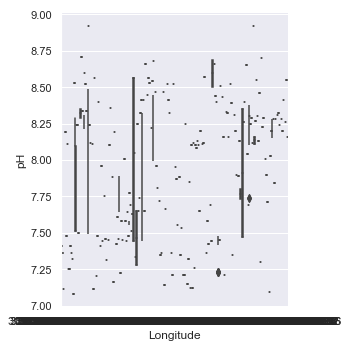

In [139]:
sns.catplot(x="Longitude", y="pH", kind="box", data=df);

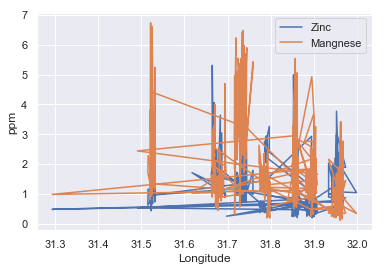

In [147]:
plt.plot(data['Longitude'], data['Zinc(ppm)'])
plt.plot(data['Longitude'], data['Manganese (ppm)'])
plt.xlabel("Longitude")
plt.ylabel("ppm")
plt.legend(['Zinc','Mangnese'])